<font size=6> Лабораторная работа №3</font> 
        
        
<font size=4> по предмету Математическая статистика

<font size=2> Вариант 4

<font size=2> Выполнил: Чукичев А.В. R3342
    
<font size=2> Проверил: Береговенко И.И.

## Задание 1

In [3]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('mobile_phones.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


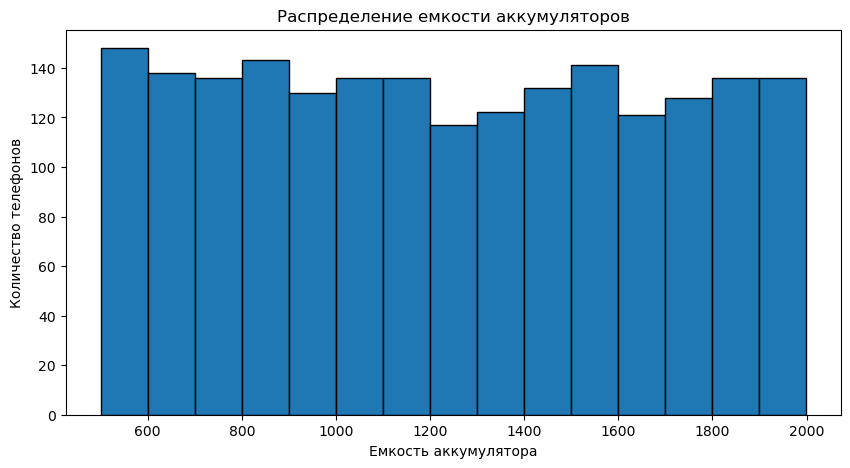

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(df['battery_power'], bins=15, edgecolor='black')
plt.title('Распределение емкости аккумуляторов', fontsize=12)
plt.xlabel('Емкость аккумулятора')
plt.ylabel('Количество телефонов')
plt.show()

Распределение емкостей аккумуляторов напоминает *равномерное распределение*.

Сформулируем гипотезы:
- $H_0$ - емкость аккумулятора распределена равномерно
- $H_1$ - емкость аккумулятора не распределена равномерно

Для проверки гипотезы воспользуемся критерием $\chi^2$.

$$ \chi^2 = \sum^k \frac{(n_{i} - n_{i}^*)^2}{n_{i}^*}, $$ где $ n_{i} $ - эмпирическая частота, $ n_{i}^* $ - теоретическая частота. Данные разбиты на k=15 интервалов.

Причем теоретическую частоту найдем по следующим формулам: $$n_{1}^* = n\frac{1}{b^*-a^*}(x_{1}-a^*)$$ - первый элемент, $$n_{k}^* = n\frac{1}{b^*-a^*}(b^*-x_{k-1})$$ - последний, $$n_{i}^* = n\frac{1}{b^*-a^*}(x_{i+1}-x_i)$$ - остальные.

Границы интервала теоретического распределения: $$a^*=\overline{X} - \sqrt{3} \sigma$$ $$b^*=\overline{X} + \sqrt{3} \sigma$$

In [9]:
mean = np.mean(df['battery_power'])
std = np.std(df['battery_power'])
a, b = mean - np.sqrt(3) * std, mean + np.sqrt(3) * std # границы интервала теоретического распределения
f = 1 / (b - a) # постоянная формулы для вычисления частот
hist, bins = np.histogram(df['battery_power'], bins=15) # разбиение на k интервалов

Вычислим частоты по формулам:

In [11]:
th1 = 2000 * (bins[1] - a) * f
thk = 2000 * (b - bins[-2]) * f
th = [th1]
for i in range(15 - 2):
    th.append(2000 * f * (bins[1] - bins[0]))
th.append(thk)
th = np.array(th)

In [12]:
chi = sum((hist - th) ** 2 / th)
crit = stats.chi2.ppf(1-0.05, 12) # критиеческое значение уровня значимости 0.05, 12 - количество степеней свободы: 15 - 2 -1
p_value = 1 - stats.chi2.cdf(chi, 12)

if chi < crit: print("Принимаем H0: равномерное распределение")
else: print("Отклоняем H0: не равномерное распределение")

print(f"Статистика: {chi}")
print(f"Критическое значение: {crit}")
print(f"p-value: {p_value}")

Принимаем H0: равномерное распределение
Статистика: 7.1841694056179985
Критическое значение: 21.02606981748307
p-value: 0.8452066327030932


Проверим гипотезу по критерию Колмогорова-Смирнова (статистика Колмогорова-Смирнова): $$D_n = \sup_x \left| F_n(x) - F(x) \right|$$

In [14]:
stat, p_value = stats.kstest(df['battery_power'], 'uniform', args=(a, b-a))
print(f"Статистика = {stat}")
print(f"p-value: {p_value}")

if p_value > 0.05: print("Принимаем H0: равномерное распределение")
else: print("Отклоняем H0: не равномерное распределение")

Статистика = 0.015367148910880545
p-value: 0.7262864970349476
Принимаем H0: равномерное распределение


Таким образом, подтвердилась гипотеза о равномерности распределения емкости аккумулятора.

## Задание 2

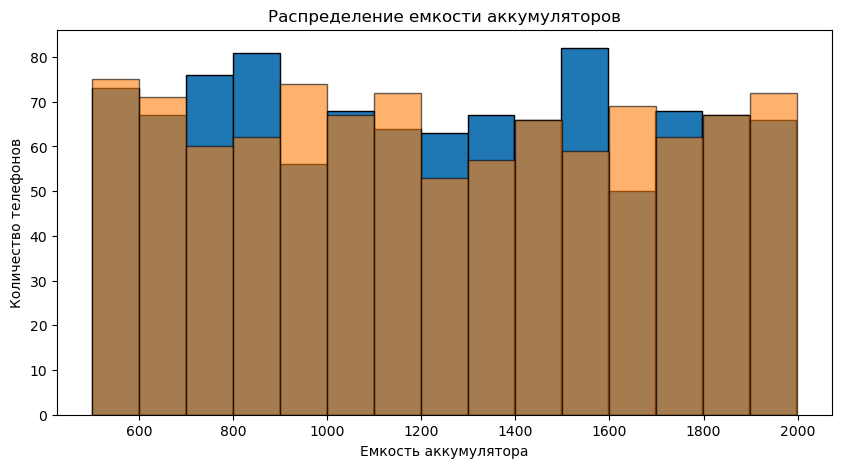

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(df[df['wifi'] == 1]['battery_power'], bins=15, edgecolor='black')
plt.hist(df[df['wifi'] == 0]['battery_power'], bins=15, edgecolor='black', alpha=0.6)

plt.title('Распределение емкости аккумуляторов', fontsize=12)
plt.xlabel('Емкость аккумулятора')
plt.ylabel('Количество телефонов')
plt.show()

В данном задании необходимо проверить равенство распределений двух групп: емкость аккумулятора телефона с поддержкой wi-fi и без.

- $H_0$ - распределения групп равны
- $H_1$ - распределения групп различны

Тесто Манна-Уитни. Статистика Манна-Уитни определяется как наименьшее из: $$U_1 = n_1 n_2 + \frac{n_1 (n_1 + 1)}{2} - R_1 $$ $$U_1 = n_1 n_2 + \frac{n_2 (n_2 + 1)}{2} - R_2$$, где $R_1, R_2$ - суммы рангов в группах после ранжирования.

In [22]:
wifi = df[df['wifi'] == 1]['battery_power']
no_wifi = df[df['wifi'] == 0]['battery_power']
n1 = len(wifi)
n2 = len(no_wifi)

all = np.concatenate([wifi, no_wifi])
ranks = np.argsort(np.argsort(all)) + 1

ranks_wifi = ranks[:n1]
ranks_no_wifi = ranks[n1:]


R1 = np.sum(ranks_wifi)
R2 = np.sum(ranks_no_wifi)

U1 = n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 = n1 * n2 + (n2 * (n2 + 1)) / 2 - R2
#Выбираем минимальное значение U
U = min(U1, U2)

Для достаточно больших выборок $U$ ~ нормально распределено. В этом случае рассмотрим: $$z = \frac{U - \mu_U}{\sigma_U},$$ где $$\mu_U = \frac{n_1 n_2}{2}$$ $$\sigma_U = \sqrt{\frac{n_1 n_2 (n_1 + n_2 + 1)}{12}} $$

In [31]:
#Нормальное приближение
mu_u = n1 * n2 / 2
sigma_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
z = (U - mu_u) / sigma_u
p_value = 2 * stats.norm.sf(abs(z))
print(f"Z-значение: {z}") 
print(f"p-значение: {p_value}")

if p_value > 0.05: print("Принимаем H0: распределения одинаковы")
else: print("Отклоняем H0: распределения неодинаковы")

Z-значение: -0.3796496035074918
p-значение: 0.7042055344985165
Принимаем H0: распределения одинаковы


Теперь проверим гипотезы с помощью двухвыборочного критерия Колмогорова-Смирнова:

In [34]:
stat, p_value = stats.ks_2samp(wifi, no_wifi)
print(f"Статистика Колмогорова-Смирнова = {stat}")
print(f"p-value: {p_value}")

if p_value > 0.05: print("Принимаем H0: распределения одинаковы")
else: print("Отклоняем H0: распределения неодинаковы")

Статистика Колмогорова-Смирнова = 0.028327552200231244
p-value: 0.8018408971218307
Принимаем H0: распределения одинаковы


Таким образом, оба теста подтвердили гипотезу о том, что распределения емкости аккумулятора разных групп **одинаковы**.

## Задание 3

В этом задании нужно проверить зависимость объема емкости и цены. Имеем следующие гипотезы:
- $H_0$ - при увеличении емкости цена не меняется
- $H_1$ - при увеличении емкости цена меняется

Проверим гипотезы с помощью критерия корреляции Пирсона: $$r_{xy} = \frac{\sum (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum(x_i-\overline{x})^2} \sqrt{\sum (y_i - \overline{y})^2}}.$$

In [40]:
x = df['battery_power']
y = df['price_range']
mu1 = np.mean(x)
mu2 = np.mean(y)

In [42]:
r = sum((x - mu1) * (y - mu2)) / (np.sqrt(sum((x - mu1) ** 2)) * np.sqrt(sum((y - mu2) ** 2)))
t_stat = r * np.sqrt((len(df) - 2) / (1 - r ** 2))

Критическим значением является  квантиль распределения Стьюдента с $n - 2$ степенями свободы

In [45]:
crit = stats.t.ppf(1 - 0.05 / 2, len(df) - 2)
print(f"t-статистика: {t_stat}")
print(f"t-критическое: {crit}")

if t_stat < crit: print("Принимаем H0: цена не зависит от емкости аккумулятора")
else: print("Отклоняем H0: цена зависит от емкости аккумулятора")

t-статистика: 9.158491232205316
t-критическое: 1.9611520148367056
Отклоняем H0: цена зависит от емкости аккумулятора


Проверим гипотезы с помощью критерия Спирмана

In [48]:
r_s, p_value = stats.spearmanr(x, y)
print(f"Коэффициент корреляции Спирмана: {r_s}")
print(f"p-value: {p_value}")

if p_value > 0.05: print("Принимаем H0: цена не зависит от емкости аккумулятора")
else: print("Отклоняем H0: цена зависит от емкости аккумулятора")

Коэффициент корреляции Спирмана: 0.19999095450908858
p-value: 1.7223057044179651e-19
Отклоняем H0: цена зависит от емкости аккумулятора


Таким образом, можно говорить о зависимости цены от емкости аккумулятора.